In [1]:
%load_ext autoreload
%autoreload 2
import k2movie
import astropy.units as u
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import K2ephem
from scipy.signal import medfilt
from astropy.coordinates import SkyCoord
import astropy.units as u


trappist1b_level=10
trappist1b_level2=40


In [2]:
no=k2movie.movie(loc=(270,720),
                  channel=58,
                  cadence='all',
                  campaign=8,
                  cmap='inferno',
                  tol=100,
                  inset=False,
                  verbose=False,
                  data_dir='/Volumes/cupertino/c8-nocmr_database/',
                  output_dir='../movies/',
                return_radec=True)
#fig,ax=plt.subplots(figsize=(10,10))
#fig=mov.inspect(ax)
no.produce()
no.populate()
new=k2movie.movie(loc=(270,720),
                  channel=58,
                  cadence='all',
                  campaign=8,
                  cmap='inferno',
                  tol=100,
                  inset=False,
                  verbose=False,
                  data_dir='/Volumes/cupertino/c8-newthreshold_database/',
                  output_dir='../movies/',
                return_radec=True)
#fig,ax=plt.subplots(figsize=(10,10))
#fig=mov.inspect(ax)
new.produce()
new.populate()
old=k2movie.movie(loc=(270,720),
                  channel=58,
                  cadence='all',
                  campaign=8,
                  cmap='inferno',
                  tol=100,
                  inset=False,
                  verbose=False,
                  data_dir='/Volumes/cupertino/database/',
                  output_dir='../movies/',
                return_radec=True)
#fig,ax=plt.subplots(figsize=(10,10))
#fig=mov.inspect(ax)
old.produce()
old.populate()


/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


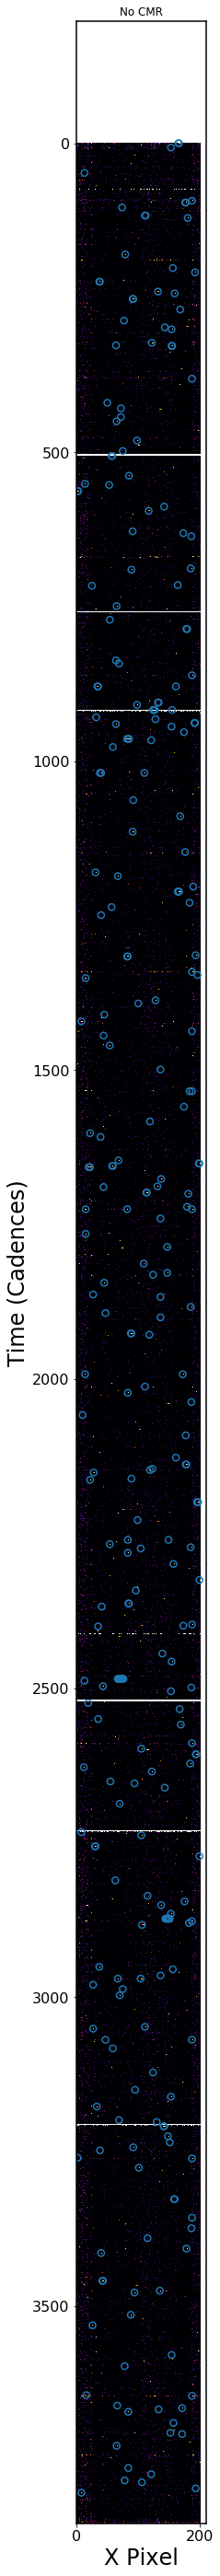

In [3]:
ar=no.ar
av2d=np.asarray([medfilt(a,5) for a in np.nanmedian(ar,axis=1)]).T
av2d[0:12,:]=([av2d[13,:] for a in range(0,12)])
av2d[-12:,:]=([av2d[-13,:] for a in range(0,12)])

thresh=np.nanstd(np.asarray([a for a in np.nanmedian(ar,axis=1)]).T,axis=0)
mean=np.mean(np.asarray([a for a in np.nanmedian(ar,axis=1)]).T,axis=0)
vals=[]
plt.figure(figsize=(10,50))
plt.imshow((np.nanmedian(ar,axis=1).T-av2d),vmin=-8,vmax=-1,cmap=plt.get_cmap('inferno_r'))
n=np.zeros(len(ar.T))
for i,a in enumerate(ar.T):
    diff=np.nanmedian(a,axis=0)-av2d[i]
    pos=np.where(diff-(-3*thresh)<0.)[0]
    n[i]=len(pos)
    for p in pos:
        vals.append(mean[p])
    plt.scatter(pos,np.zeros(n[i].astype(int))+i,edgecolor='C0',lw=1.5,facecolor='None',marker='o',s=50)

plt.ylabel('Time (Cadences)')
plt.xlabel('X Pixel')
plt.title('No CMR')

In [4]:
print('Average cosmic ray hits per cadence, per pixel column: {}'.format(np.mean(n)/(200.)))
print('Average cosmic ray hits per cadence, per module (2048x2048 pixels): {}'.format(2048*np.mean(n)/(200.)))
print('Average cosmic ray hits per campaign (~3800 cadences), per module (2048x2048 pixels): {}'.format(3800*2048*np.mean(n)/(200.)))

Average cosmic ray hits per cadence, per pixel column: 0.00038161993769470404
Average cosmic ray hits per cadence, per module (2048x2048 pixels): 0.7815576323987539
Average cosmic ray hits per campaign (~3800 cadences), per module (2048x2048 pixels): 2969.9190031152643


/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':
/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


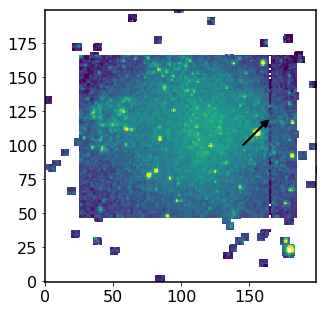

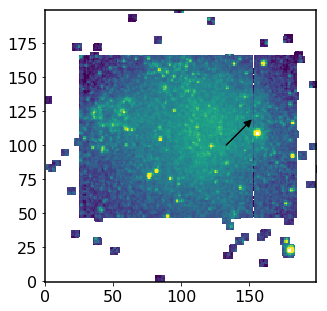

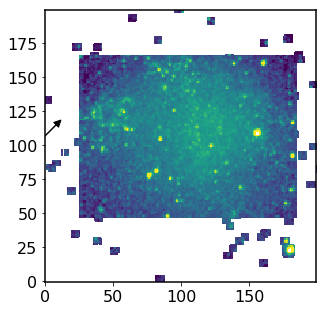

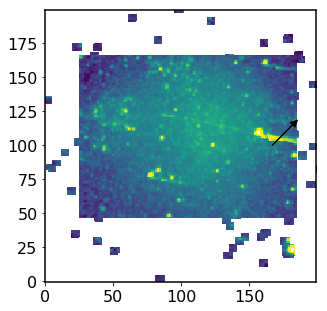

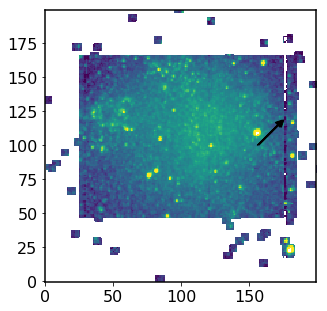

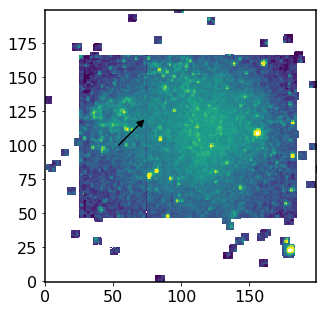

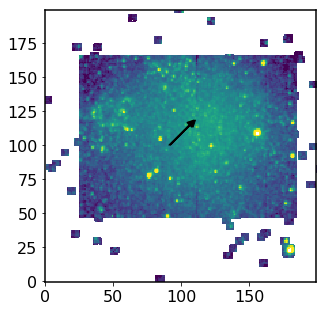

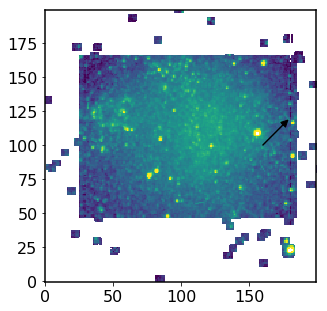

In [5]:
av2d=np.asarray([medfilt(a,5) for a in np.nanmedian(ar,axis=1)]).T
av2d[0:12,:]=([av2d[13,:] for a in range(0,12)])
av2d[-12:,:]=([av2d[-13,:] for a in range(0,12)])

thresh=np.nanstd(np.asarray([a for a in np.nanmedian(ar,axis=1)]).T,axis=0)

for i,a in enumerate(ar.T):
    diff=np.nanmedian(a,axis=0)-av2d[i]
    pos=(np.where(diff-(-3*thresh)<0.)[0])
    if len(pos)>0:
        fig,ax=plt.subplots(1,figsize=(5,5))
        plt.imshow(np.log10(a),vmin=1,vmax=3,origin='bottom')
        for p in pos:       
            ax.arrow(p-20, 100, 15, 15, head_width=5, head_length=5, fc='k', ec='k')
            plt.axvline(p,ls='')
    if i>=150:
        break


/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater
/Users/ch/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_la

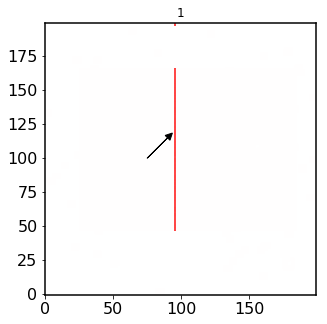

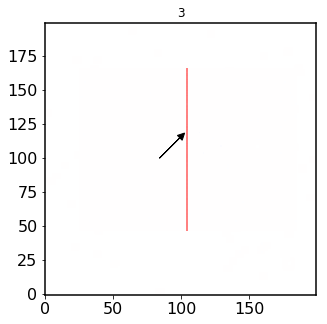

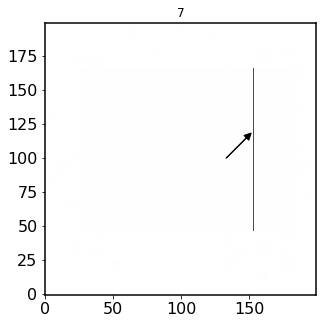

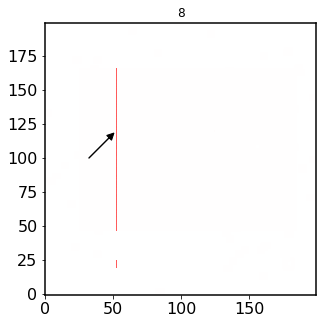

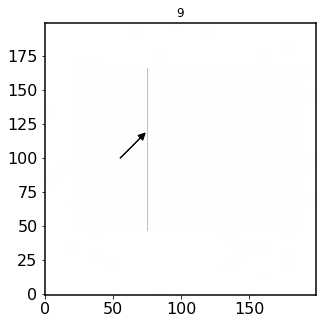

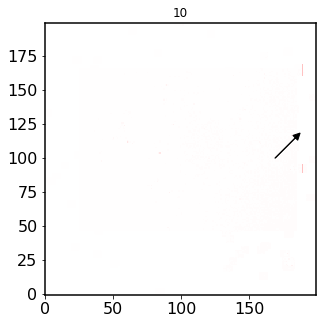

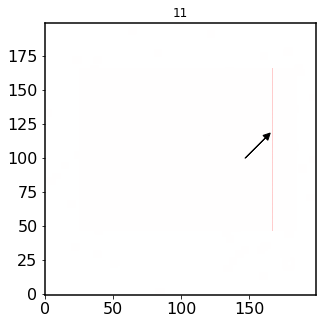

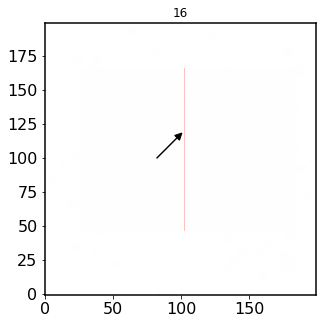

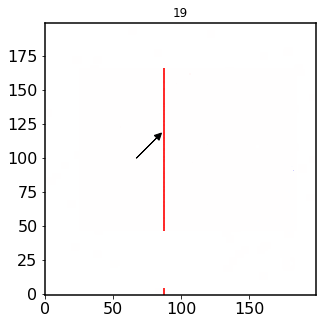

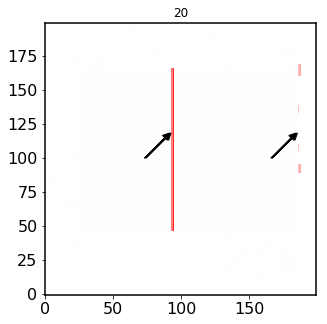

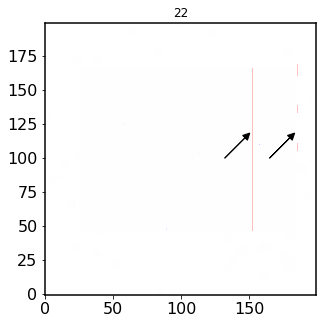

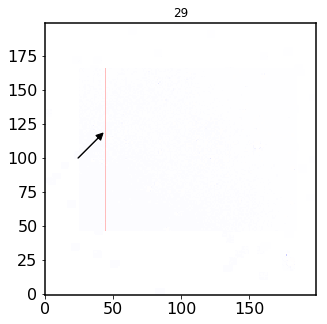

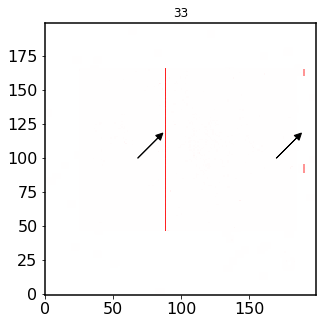

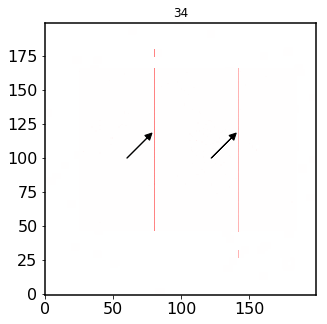

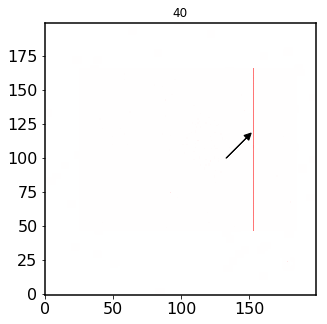

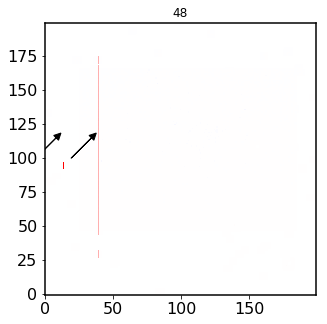

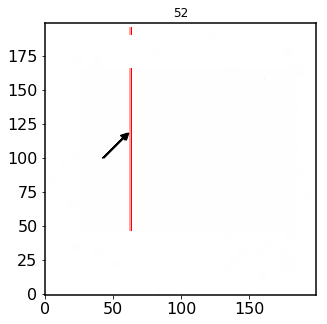

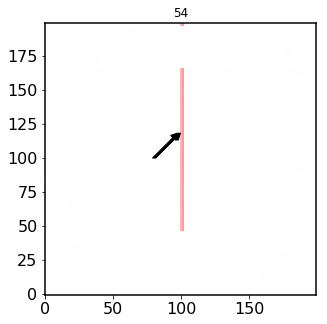

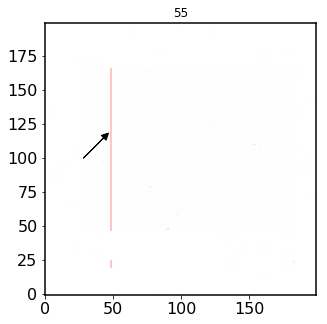

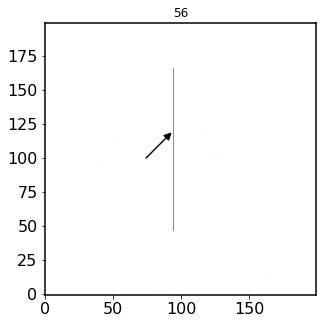

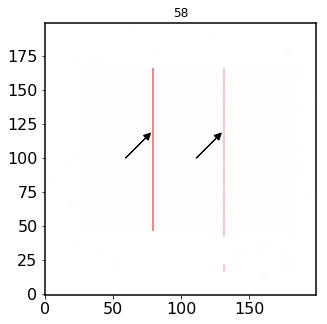

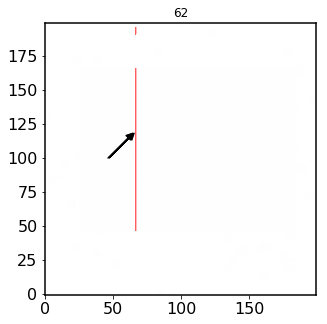

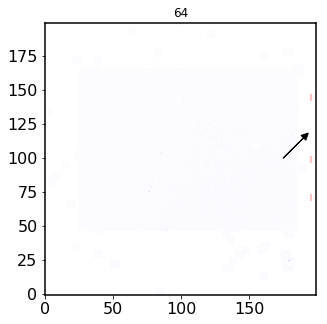

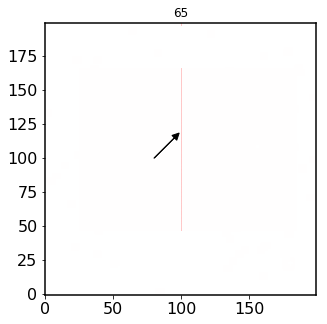

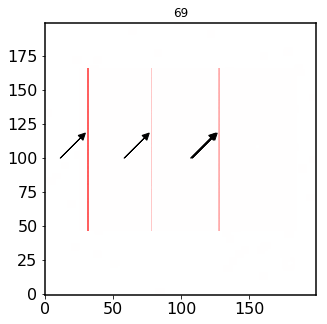

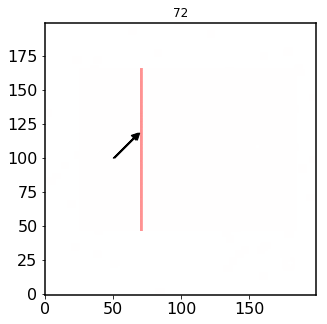

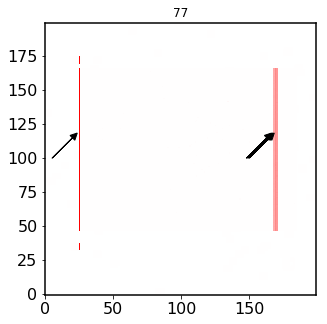

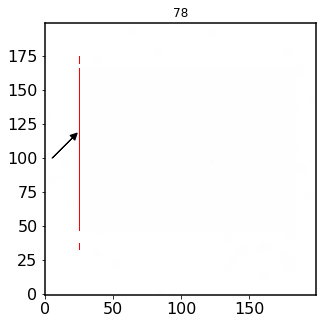

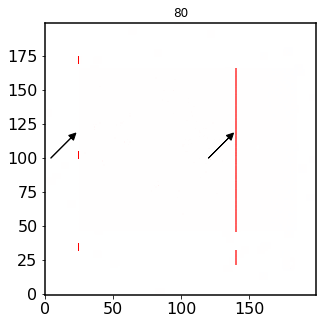

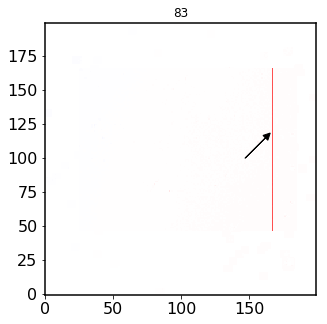

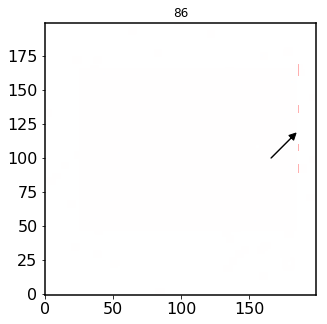

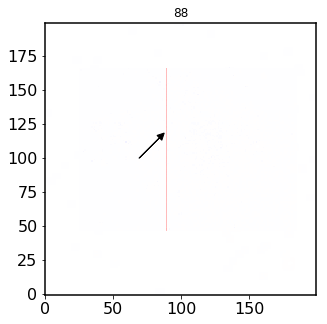

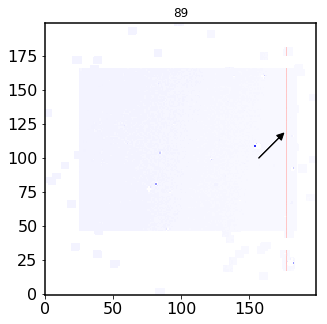

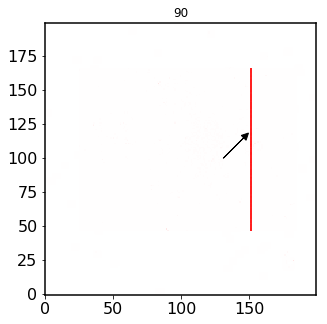

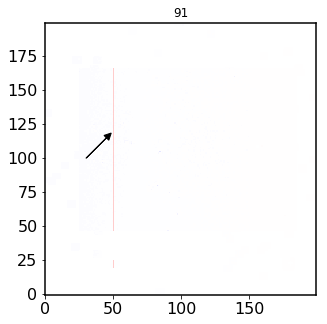

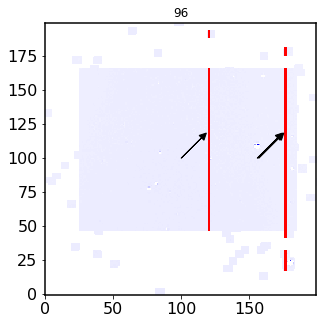

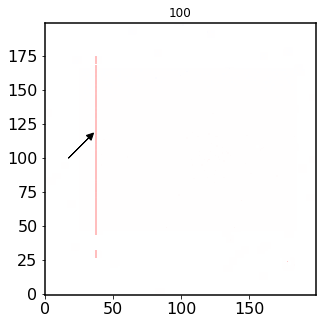

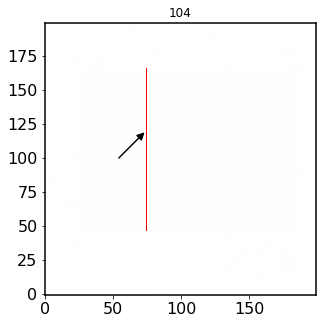

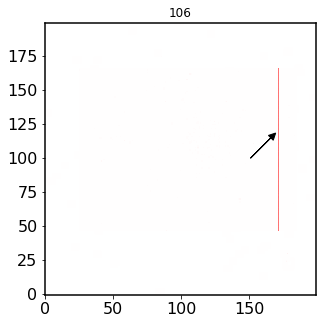

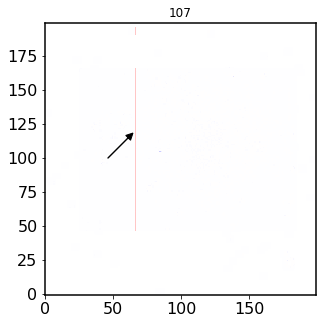

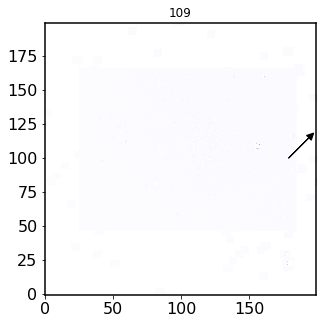

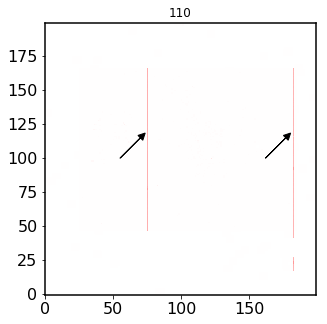

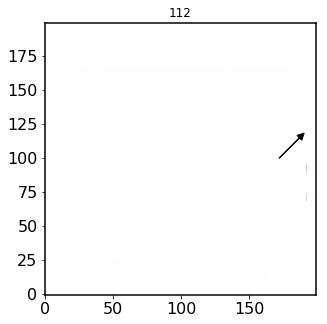

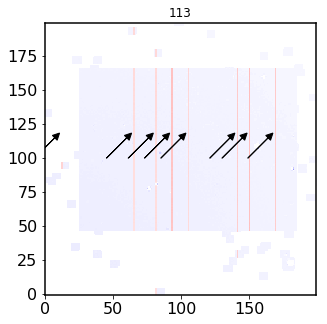

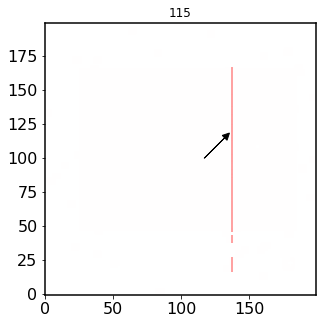

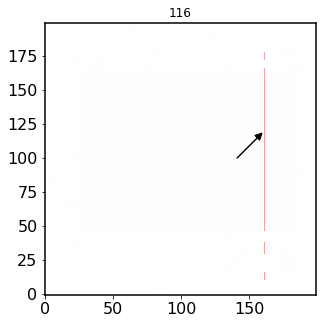

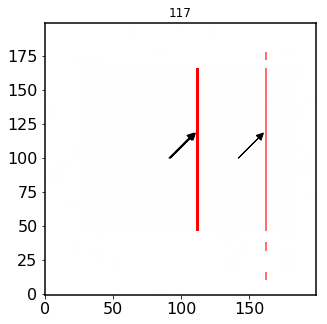

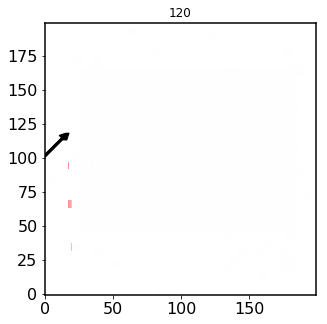

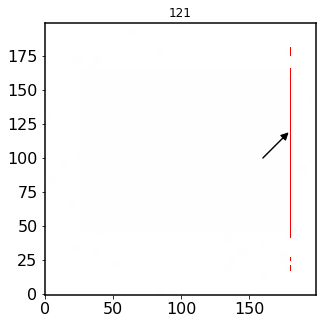

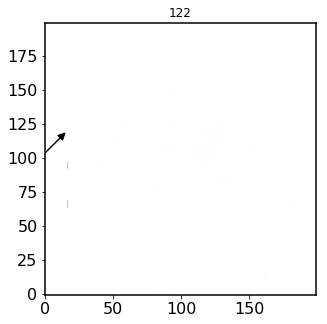

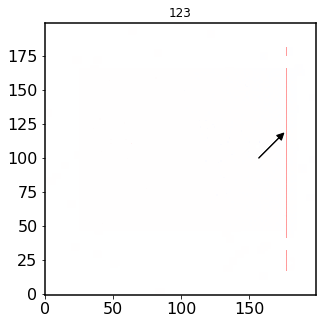

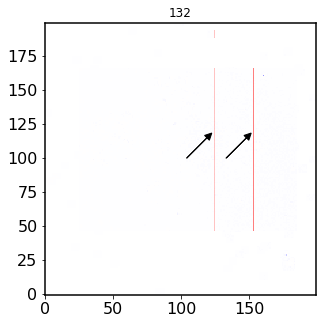

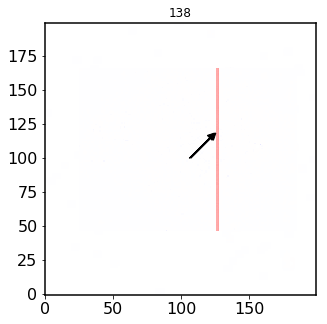

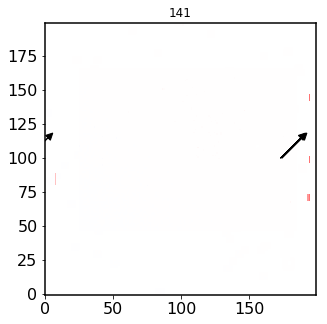

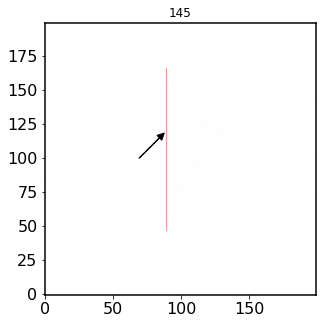

In [6]:

ar=new.ar-no.ar
newn=np.zeros(len(ar.T))
newvals=[]

for i,a in zip(np.arange(len(ar.T)),ar.T):
    mean=np.nanmean(a,axis=0)
    thresh=np.nanstd(a,axis=0)
    thresh[thresh==0]=np.mean(thresh[thresh!=0])
    try:
        l=np.polyfit(np.arange(len(mean[mean<1])),mean[mean<1],1,w=thresh[mean<1])
        mean-=np.polyval(l,np.arange(len(mean)))
    except:
        mean=np.nanmean(a,axis=0)
    #std2d=np.asarray([b-mean for b in a])
    #thresh=np.nanstd(std2d,axis=0)
    pos=np.where(np.abs(mean-np.nanmean(a))>1)[0]
    if len(pos)>100:
        continue
    newn[i]=len(pos)
    for p in pos:
        newvals.append(mean[p])
#    plt.scatter(pos,np.zeros(n[i].astype(int))+i,edgecolor='C0',lw=1.5,facecolor='None',marker='o',s=50)


    if (len(pos)>0) & (i<150):
        fig,ax=plt.subplots(1,figsize=(5,5))
        plt.imshow(a,vmin=-trappist1b_level,vmax=trappist1b_level,origin='bottom',cmap='bwr')
        for p in pos:       
            ax.arrow(p-20, 100, 15, 15, head_width=5, head_length=5, fc='k', ec='k')
            plt.axvline(p,ls='')
            plt.title('{}'.format(i))



/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/Users/ch/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warni

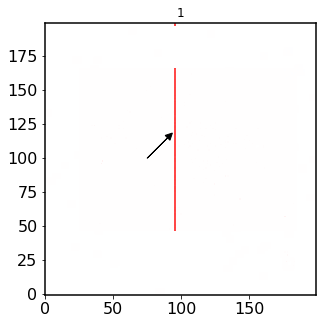

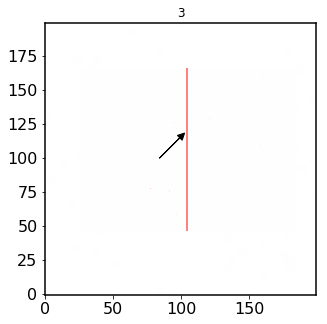

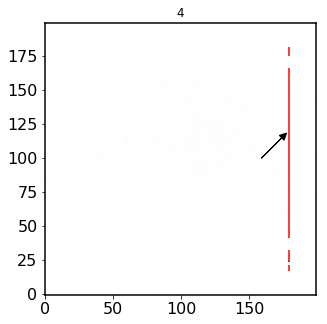

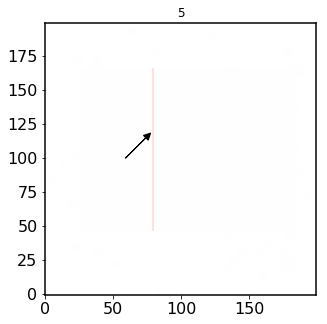

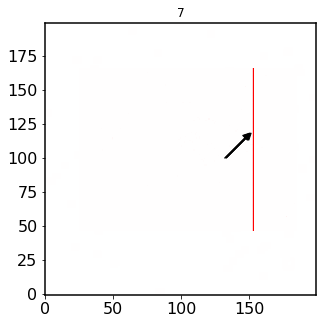

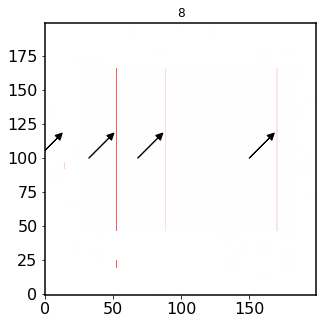

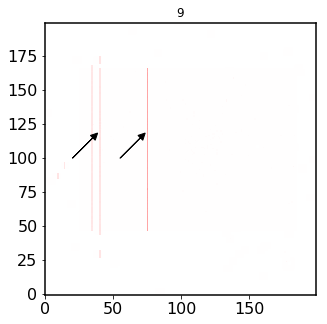

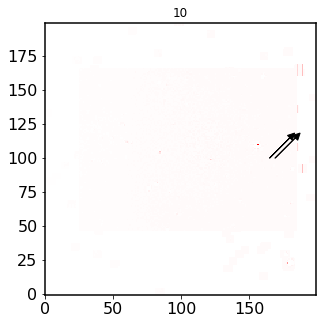

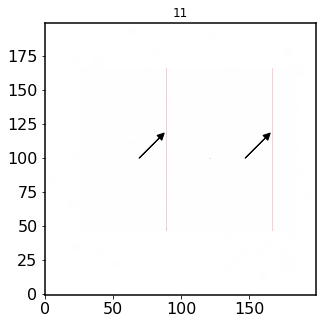

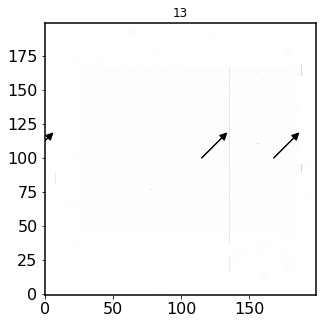

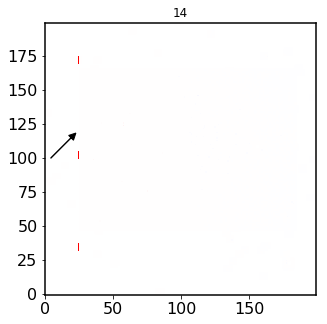

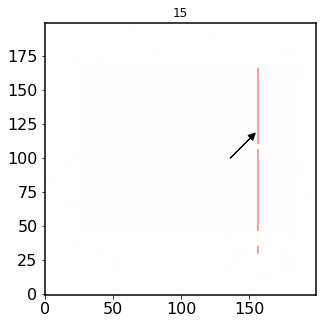

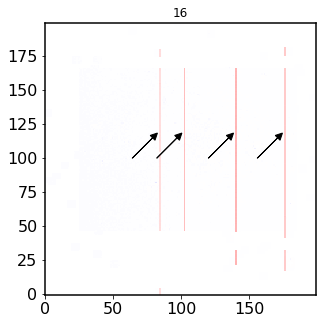

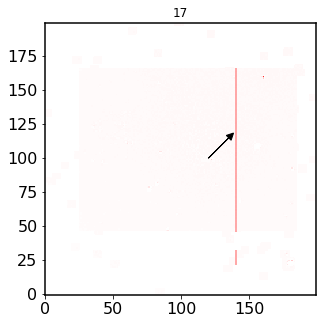

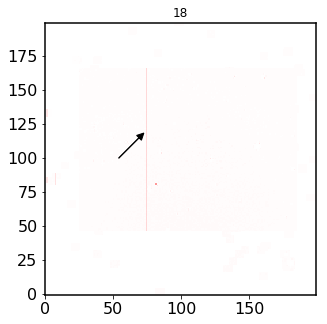

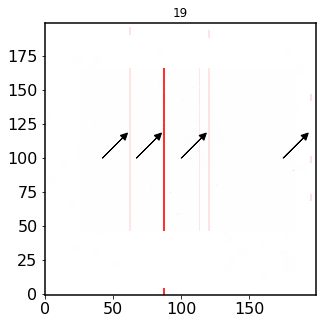

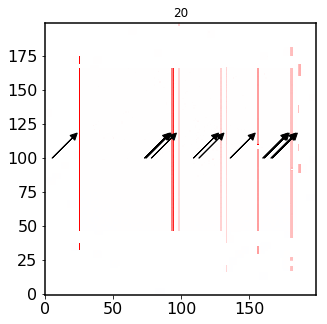

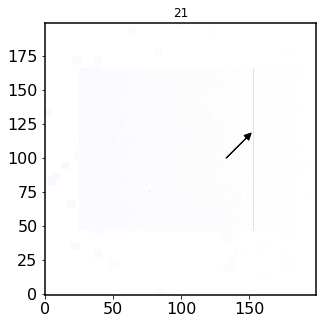

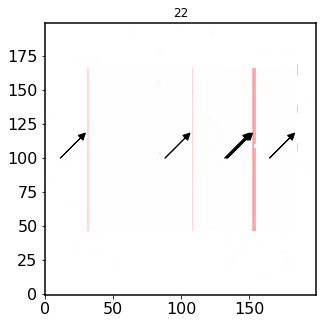

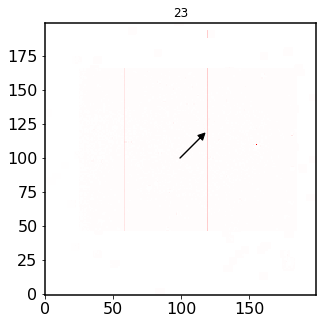

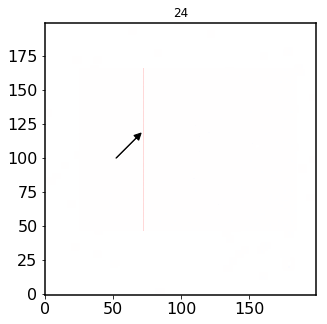

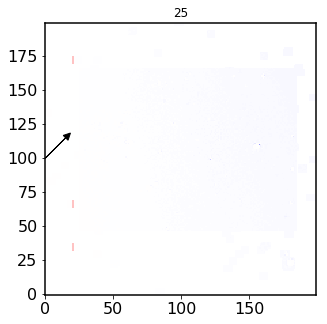

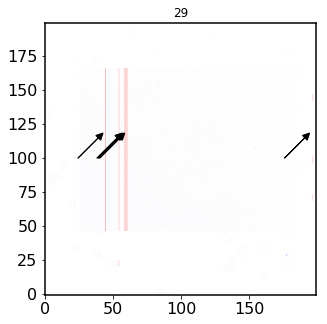

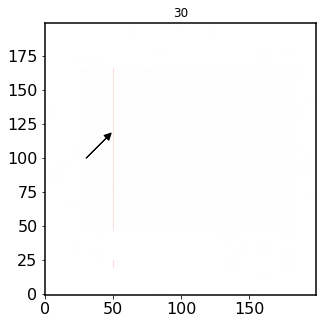

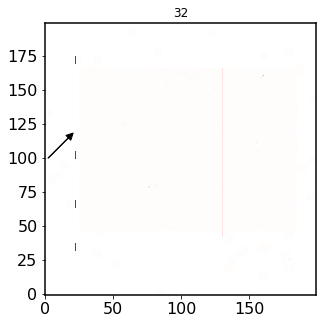

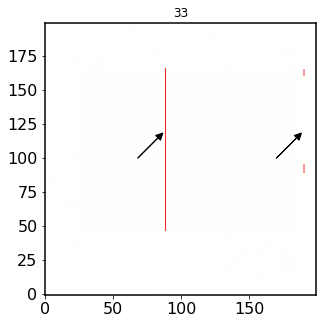

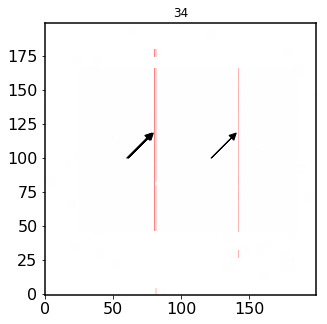

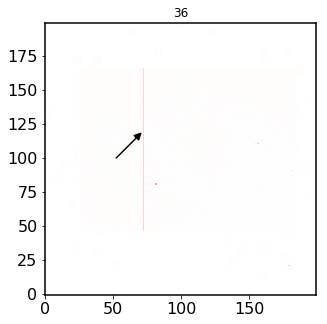

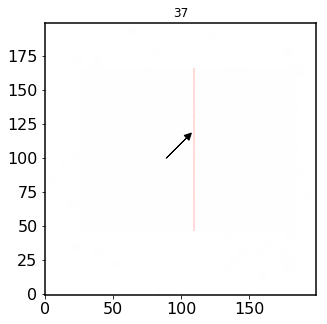

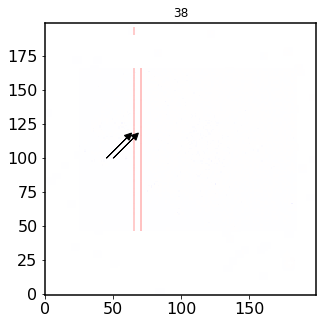

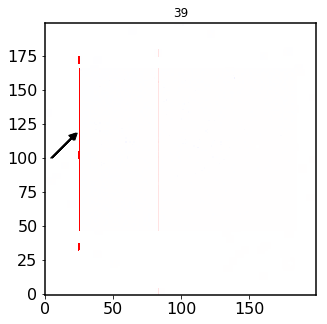

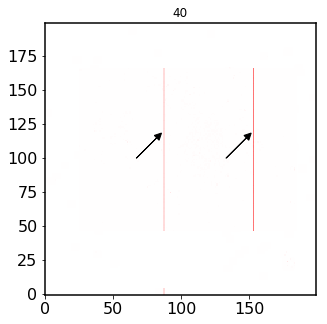

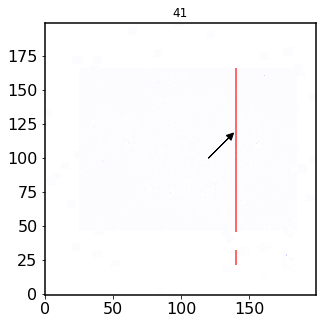

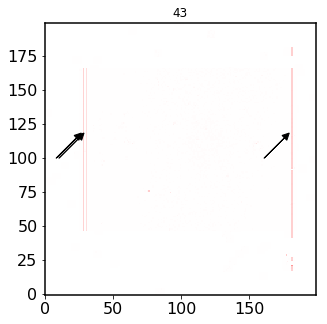

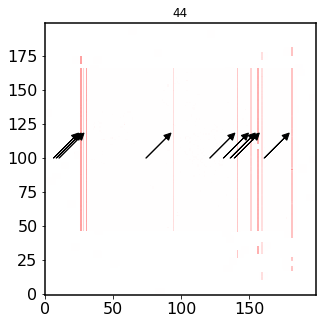

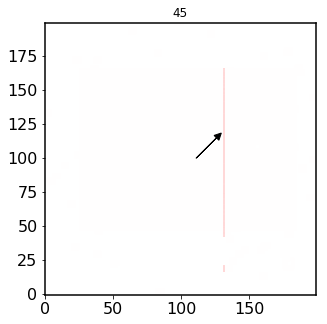

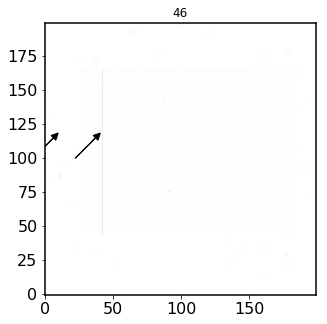

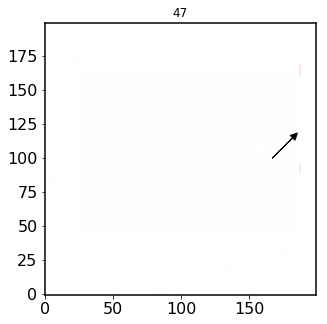

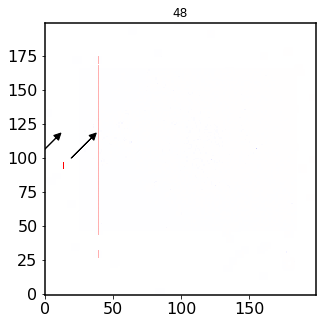

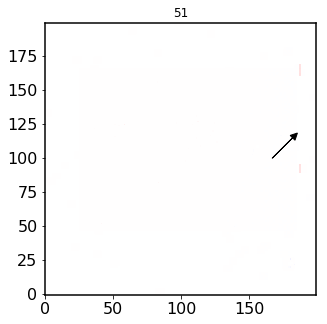

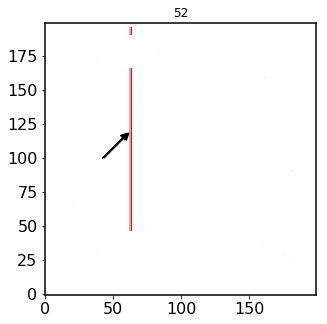

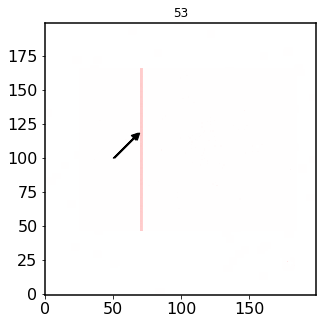

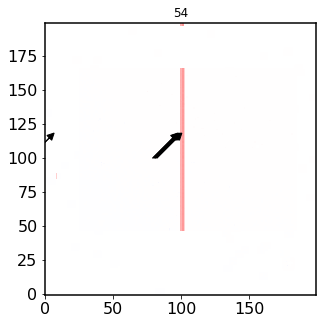

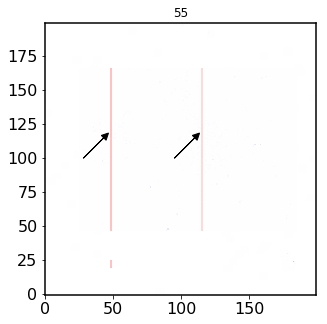

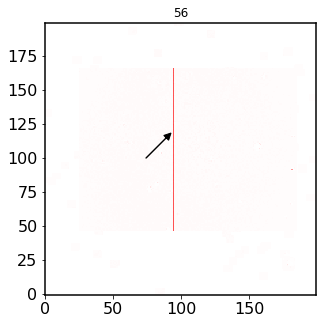

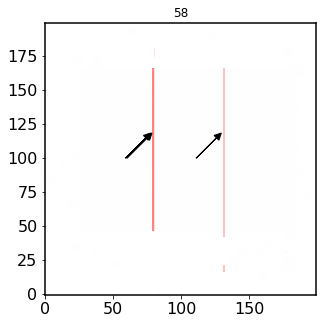

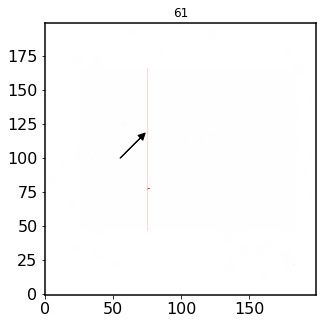

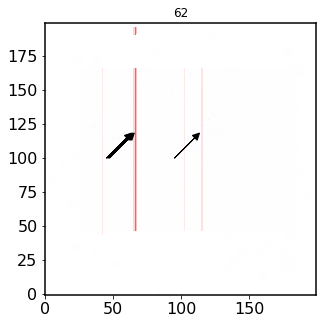

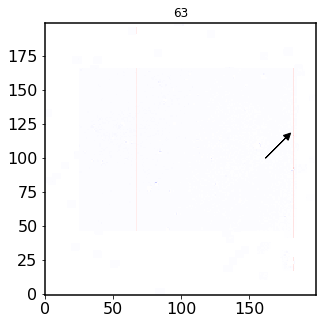

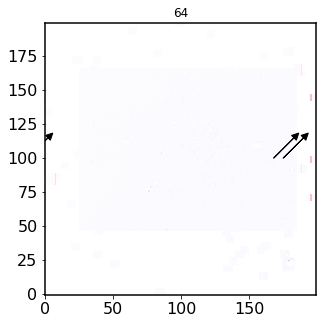

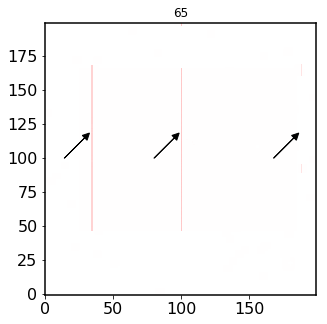

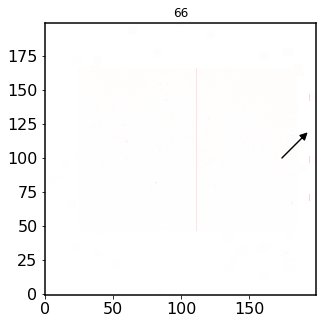

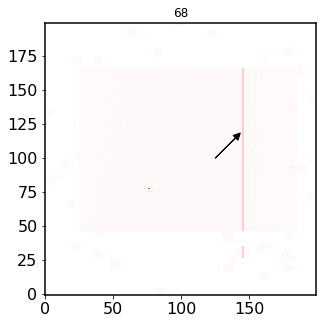

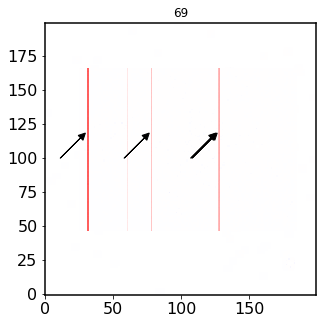

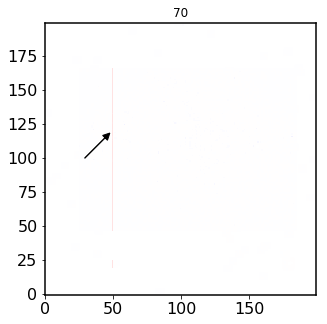

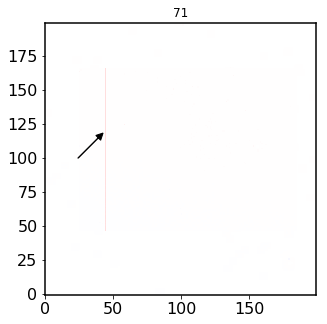

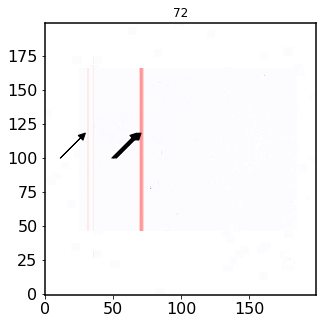

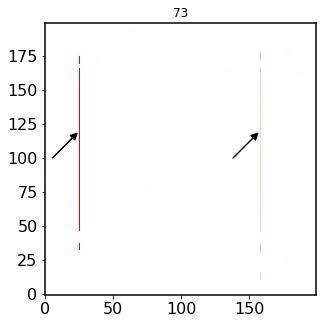

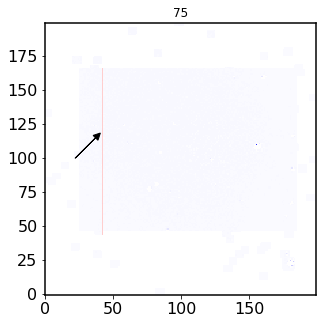

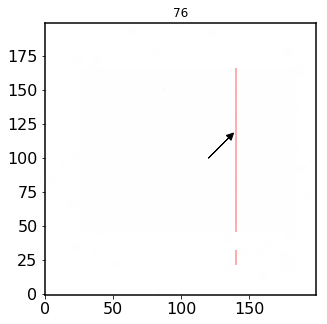

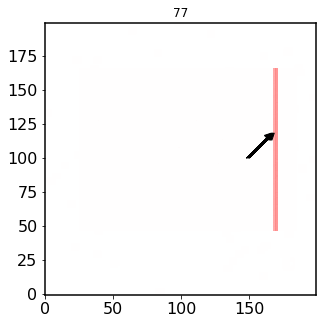

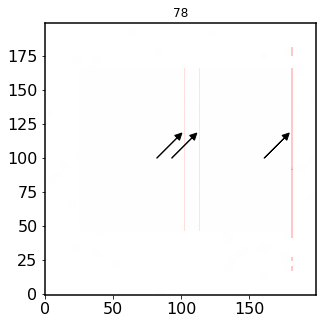

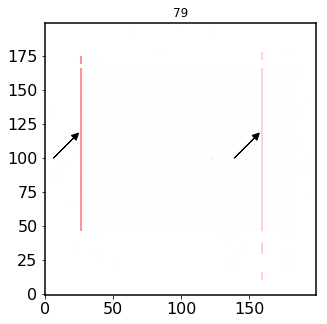

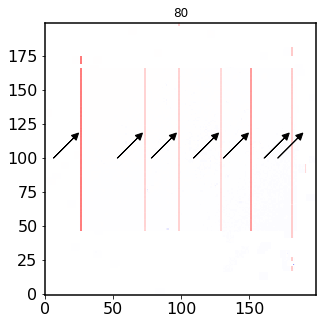

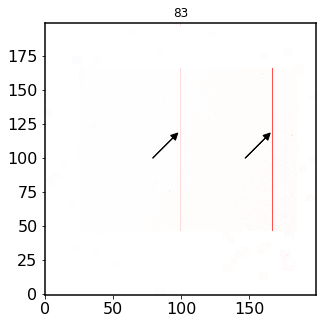

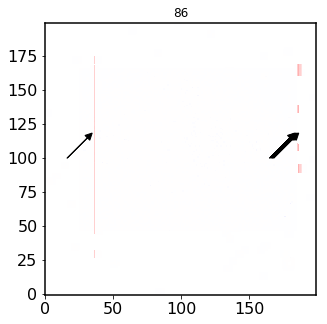

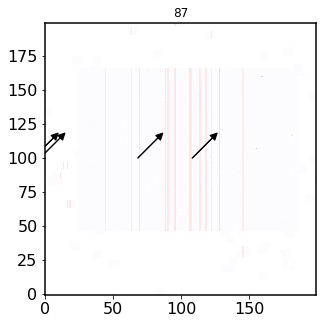

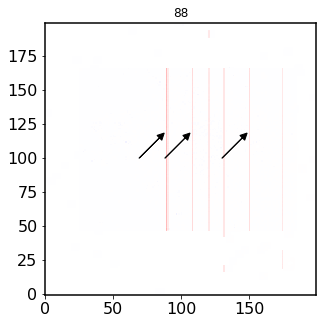

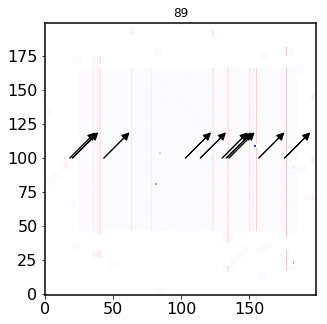

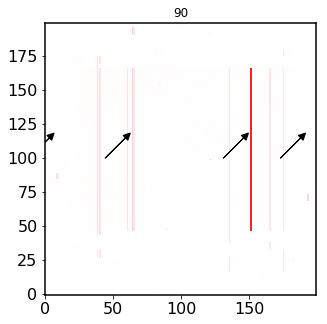

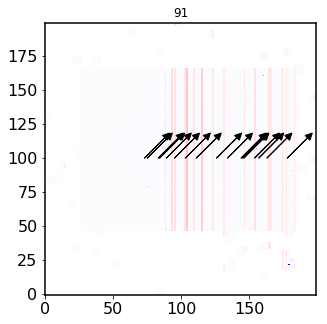

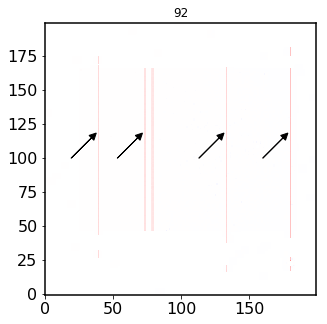

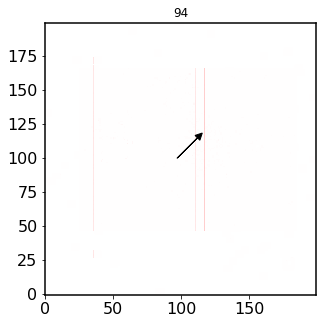

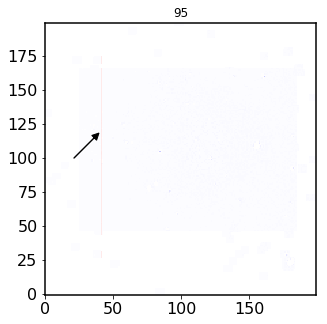

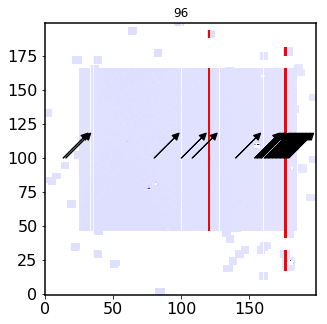

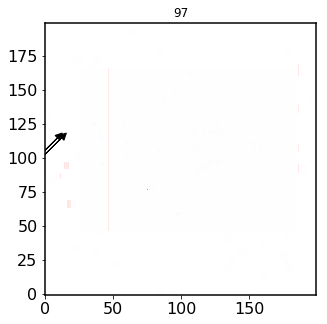

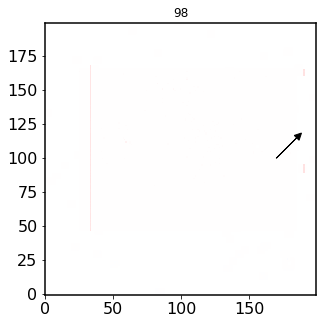

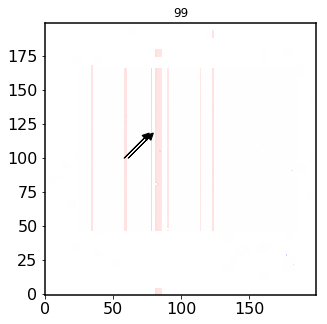

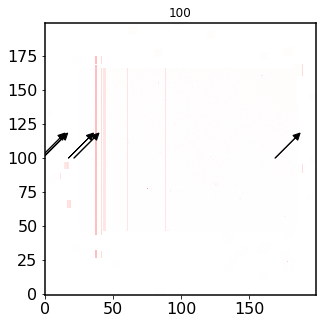

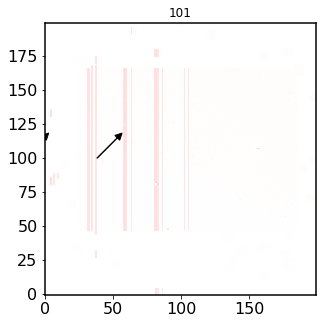

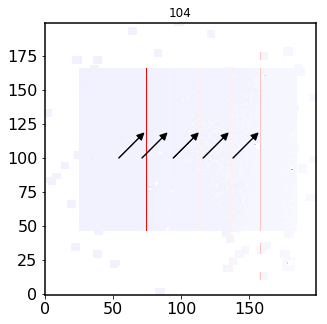

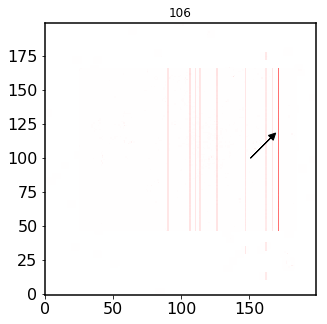

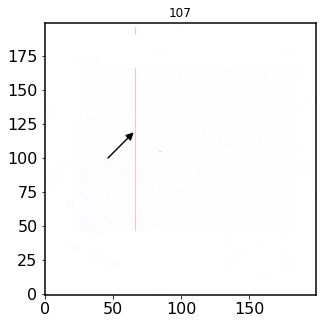

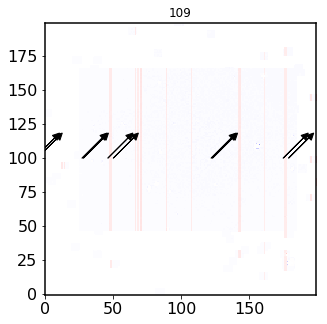

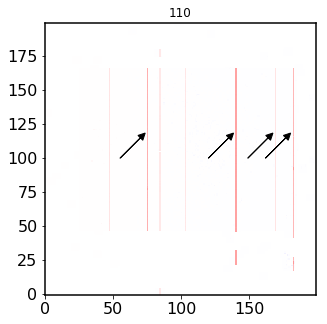

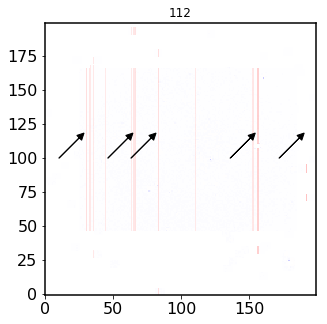

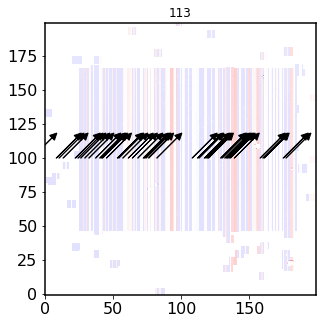

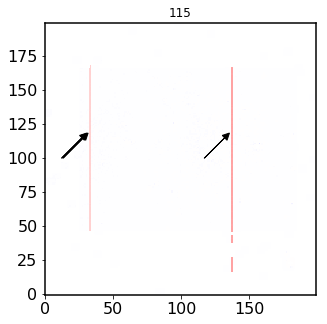

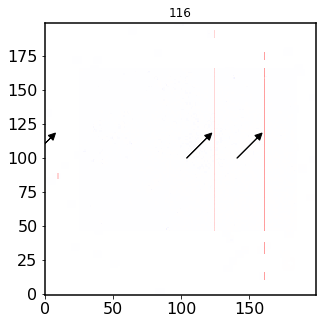

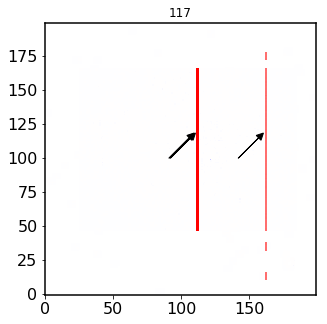

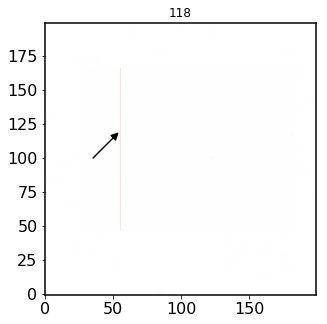

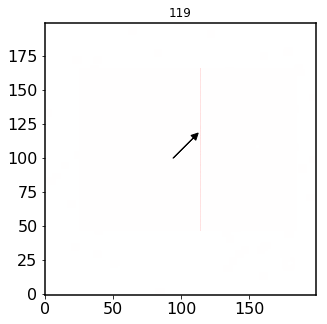

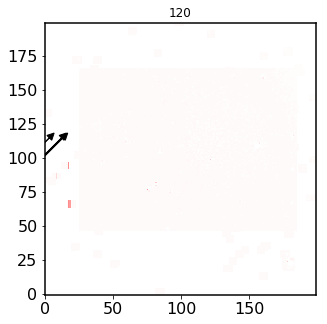

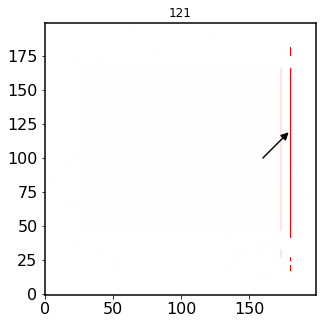

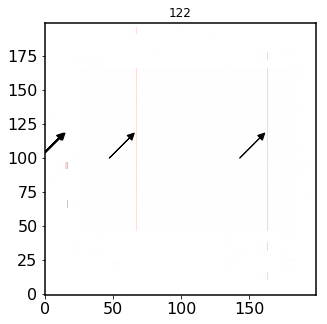

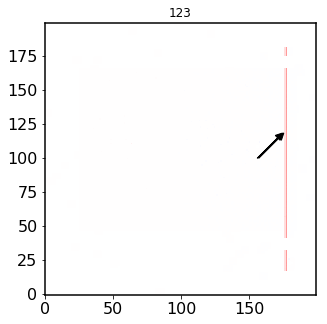

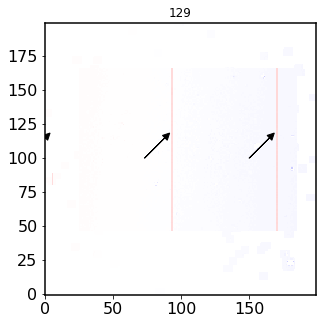

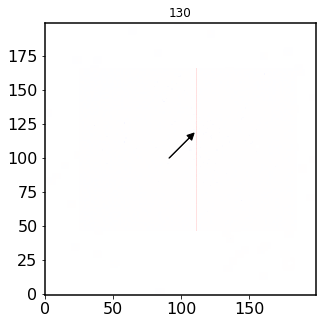

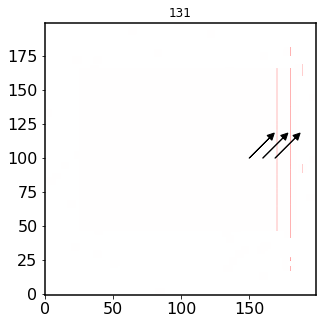

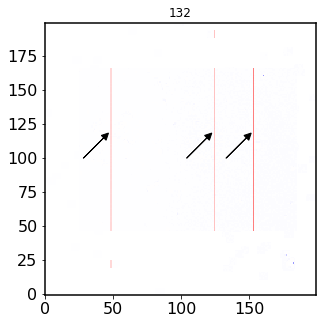

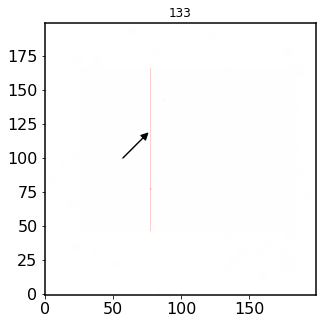

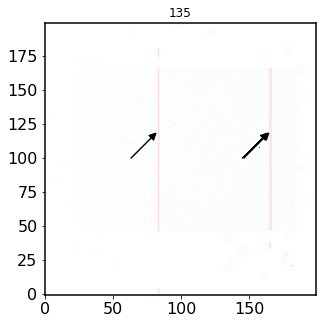

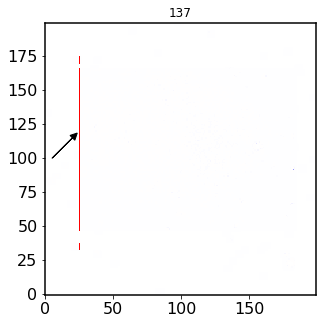

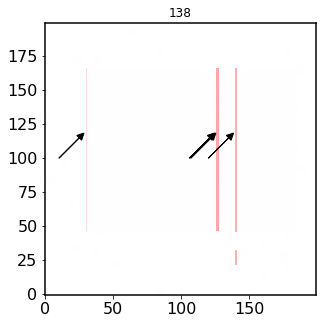

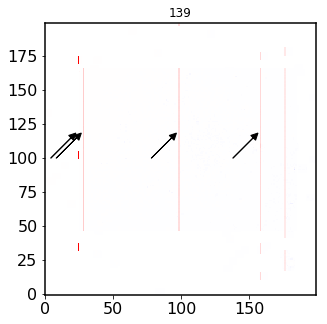

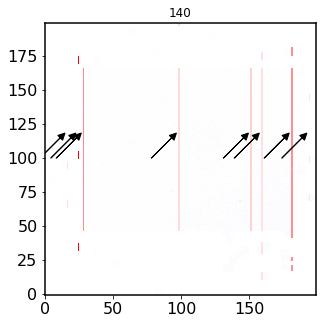

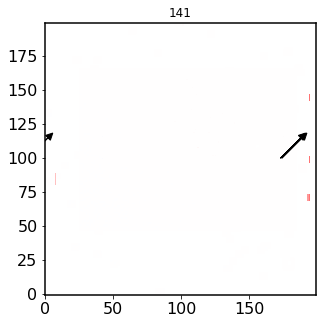

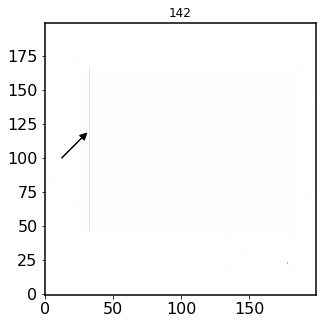

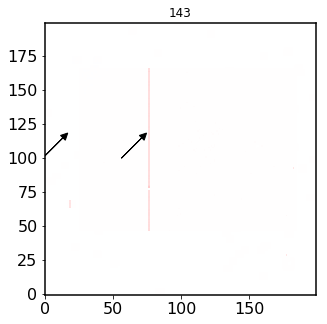

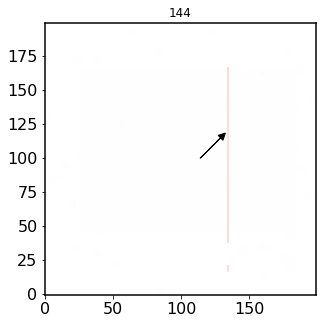

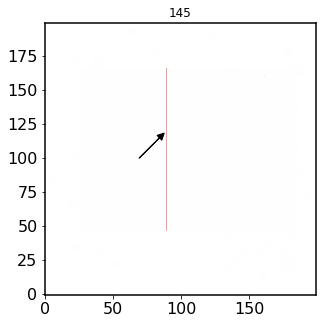

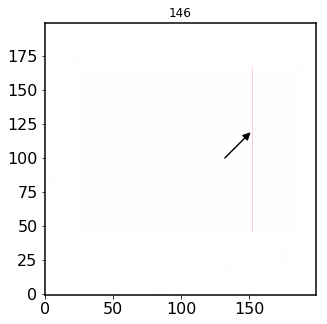

In [7]:
#plt.figure(figsize=(10,50))
#plt.imshow((np.nanmean(ar,axis=1).T),vmin=-40,vmax=40,cmap=plt.get_cmap('bwr'))
ar=old.ar-no.ar
oldn=np.zeros(len(ar.T))
oldvals=[]

for i,a in zip(np.arange(len(ar.T)),ar.T):
    mean=np.nanmean(a,axis=0)
    thresh=np.nanstd(a,axis=0)
    thresh[thresh==0]=np.mean(thresh[thresh!=0])
    try:
        l=np.polyfit(np.arange(len(mean[mean<1])),mean[mean<1],1,w=thresh[mean<1])
        mean-=np.polyval(l,np.arange(len(mean)))
    except:
        mean=np.nanmean(a,axis=0)
    #std2d=np.asarray([b-mean for b in a])
    #thresh=np.nanstd(std2d,axis=0)
    pos=np.where(np.abs(mean-np.nanmean(a))>1)[0]
    if len(pos)>100:
        continue
    oldn[i]=len(pos)
    for p in pos:
        oldvals.append(mean[p])
#    plt.scatter(pos,np.zeros(n[i].astype(int))+i,edgecolor='C0',lw=1.5,facecolor='None',marker='o',s=50)


    if (len(pos)>0) & (i<150):
        fig,ax=plt.subplots(1,figsize=(5,5))
        plt.imshow(a,vmin=-trappist1b_level,vmax=trappist1b_level,origin='bottom',cmap='bwr')
        for p in pos:       
            ax.arrow(p-20, 100, 15, 15, head_width=5, head_length=5, fc='k', ec='k')
            plt.axvline(p,ls='')
            plt.title('{}'.format(i))




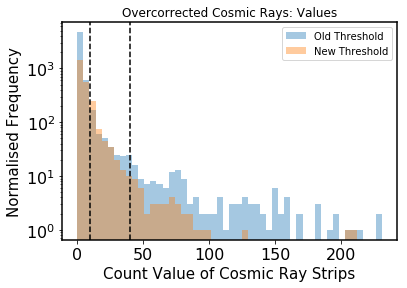

In [8]:
from astropy.modeling import models,fitting
h=plt.hist(oldvals,50,normed=False,alpha=0.4,label='Old Threshold',color='C0')

#g_init = models.Lorentz1D()
#fit_g = fitting.LevMarLSQFitter()
#g = fit_g(g_init, h[1][1:]-(h[1][1]-h[1][0])/2, h[0])
#plt.plot(h[1][1:]-(h[1][1]-h[1][0])/2,g(h[1][1:]-(h[1][1]-h[1][0])/2),c='C0')
#oldmodel=g

h=plt.hist(newvals,h[1],normed=False,alpha=0.4,label='New Threshold',color='C1')

#g_init = models.Voigt1D()
#fit_g = fitting.LevMarLSQFitter()
#g = fit_g(g_init, h[1][1:]-(h[1][1]-h[1][0])/2, h[0])
#plt.plot(h[1][1:]-(h[1][1]-h[1][0])/2,g(h[1][1:]-(h[1][1]-h[1][0])/2),c='C1')
#newmodel=g

plt.axvline(trappist1b_level,ls='--',color='black')
plt.axvline(trappist1b_level2,ls='--',color='black')

plt.title('Overcorrected Cosmic Rays: Values')
plt.legend(fontsize=10)
plt.xlabel('Count Value of Cosmic Ray Strips',fontsize=15)
plt.ylabel('Normalised Frequency',fontsize=15)

plt.yscale('log')
plt.savefig('cmr_1.png',dpi=300,bbox_inches='tight')

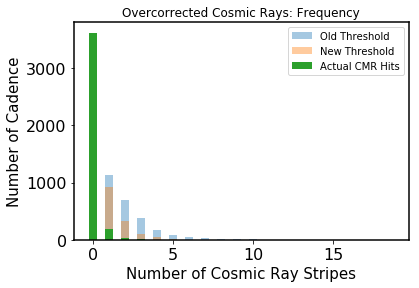

In [9]:
h=plt.hist(oldn,bins=np.arange(0,20)-0.25,width=0.5,label='Old Threshold',alpha=0.4)
_=plt.hist(newn,h[1],width=0.5,label='New Threshold',alpha=0.4)
_=plt.hist(n,h[1],width=0.5,label='Actual CMR Hits')




plt.title('Overcorrected Cosmic Rays: Frequency')

plt.legend(fontsize=10)
plt.xlabel('Number of Cosmic Ray Stripes',fontsize=15)
plt.ylabel('Number of Cadence',fontsize=15)

plt.savefig('cmr_2.png',dpi=300,bbox_inches='tight')

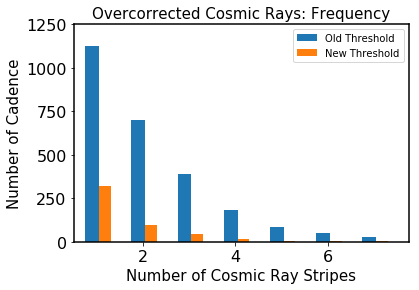

In [39]:
h=plt.hist(oldn,bins=np.arange(0,20)-0.25,width=0.3,label='Old Threshold')
_=plt.hist(newn,h[1]+0.3,width=0.25,label='New Threshold')
plt.xlim(0.5,7.75)
plt.ylim(0,1250)


plt.title('Overcorrected Cosmic Rays: Frequency',fontsize=15)

plt.legend(fontsize=10)
plt.xlabel('Number of Cosmic Ray Stripes',fontsize=15)
plt.ylabel('Number of Cadence',fontsize=15)

plt.savefig('cmr_2.png',dpi=300,bbox_inches='tight')

In [10]:
newperc=(len(np.asarray(newvals)[np.asarray(newvals)>trappist1b_level])/len(newvals))
newperc2=(len(np.asarray(newvals)[np.asarray(newvals)>trappist1b_level2])/len(newvals))

oldperc=(len(np.asarray(oldvals)[np.asarray(oldvals)>trappist1b_level])/len(oldvals))
oldperc2=(len(np.asarray(oldvals)[np.asarray(oldvals)>trappist1b_level2])/len(oldvals))

print('Old Threshold')
print('-------------')
print('Over corrected by {}x'.format(np.round(np.mean(oldn)/np.mean(n)),2))
print('Average CMR Overcorrections per cadence, per pixel column: {}'.format(np.mean(oldn)/(200.)))
print('Average CMR Overcorrections per cadence, per module : {}'.format(2048*np.mean(oldn)/(200.)))
print('Average CMR Overcorrections per campaign , per module : {:0.2}'.format(3800*2048*np.mean(oldn)/(200.)))
print('{}% Of CMR Overcorrections at TRAPPIST 1b Level '.format(np.round(oldperc*100.,1)))
print('{} cadences per light curve effected at a Lower TRAPPIST 1b level (assuming 4x4 TPF)'.format(np.round((4*(oldperc*np.mean(oldn)/200.))*3800),1))
print('{} cadences per light curve effected at a Upper TRAPPIST 1b level (assuming 4x4 TPF)'.format(np.round((4*(oldperc2*np.mean(oldn)/200.))*3800),1))





print('New Threshold')
print('-------------')
print('Over corrected by {}x'.format(np.round(np.mean(newn)/np.nanmean(n)),2))
print('Average CMR Overcorrections per cadence, per pixel column: {}'.format(np.mean(newn)/(200.)))
print('Average CMR Overcorrections per cadence, per module : {}'.format(2048*np.mean(newn)/(200.)))
print('Average CMR Overcorrections per campaign , per module : {:0.2}'.format(3800*2048*np.mean(newn)/(200.)))
print('{}% Of CMR Overcorrections at TRAPPIST 1b Level '.format(np.round(newperc*100.,1)))
print('{} cadences per light curve effected at a Lower TRAPPIST 1b level (assuming 4x4 TPF)'.format(np.round((4*(newperc*np.mean(newn)/200.))*3800),1))
print('{} cadences per light curve effected at a Upper TRAPPIST 1b level (assuming 4x4 TPF)'.format(np.round((4*(newperc2*np.mean(newn)/200.))*3800),1))






Old Threshold
-------------
Over corrected by 20.0x
Average CMR Overcorrections per cadence, per pixel column: 0.007593457943925234
Average CMR Overcorrections per cadence, per module : 15.551401869158878
Average CMR Overcorrections per campaign , per module : 5.9e+04
8.4% Of CMR Overcorrections at TRAPPIST 1b Level 
10.0 cadences per light curve effected at a Lower TRAPPIST 1b level (assuming 4x4 TPF)
3.0 cadences per light curve effected at a Upper TRAPPIST 1b level (assuming 4x4 TPF)
New Threshold
-------------
Over corrected by 8.0x
Average CMR Overcorrections per cadence, per pixel column: 0.003195742471443406
Average CMR Overcorrections per cadence, per module : 6.544880581516096
Average CMR Overcorrections per campaign , per module : 2.5e+04
17.9% Of CMR Overcorrections at TRAPPIST 1b Level 
9.0 cadences per light curve effected at a Lower TRAPPIST 1b level (assuming 4x4 TPF)
1.0 cadences per light curve effected at a Upper TRAPPIST 1b level (assuming 4x4 TPF)
